In [3]:
#importing essential libs
import pandas as pd
df2 = pd.read_csv("Housing.csv")
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(545, 13)

In [4]:
#converting objects into categorical data
df2 = df2.astype({"mainroad":"category", "guestroom":"category","basement":"category", "hotwaterheating":"category", "airconditioning":"category", "prefarea":"category", "furnishingstatus":"category"}) # astype is used for type-casting in python
df2.info()
df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    int64   
 3   bathrooms         545 non-null    int64   
 4   stories           545 non-null    int64   
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    int64   
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(7), int64(6)
memory usage: 30.3 KB


(545, 13)

In [5]:
df2.describe()
df2.shape

(545, 13)

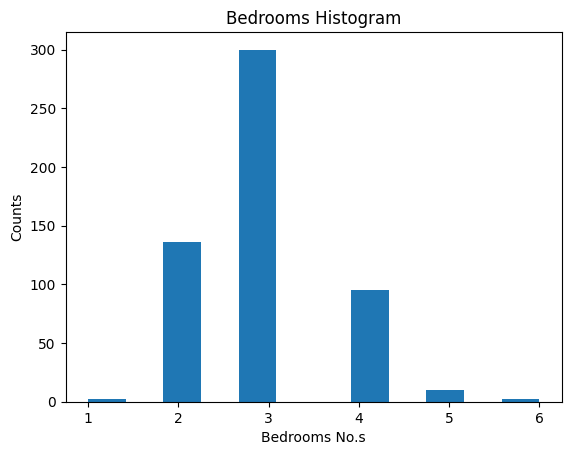

(545, 13)

In [6]:
#graphical analysis
#the bedrooms hist
import matplotlib.pyplot as plt
plt.hist(df2["bedrooms"], bins = 12)
plt.title("Bedrooms Histogram")
plt.xlabel("Bedrooms No.s")
plt.ylabel("Counts")
plt.show()
df2.shape

(545, 13)

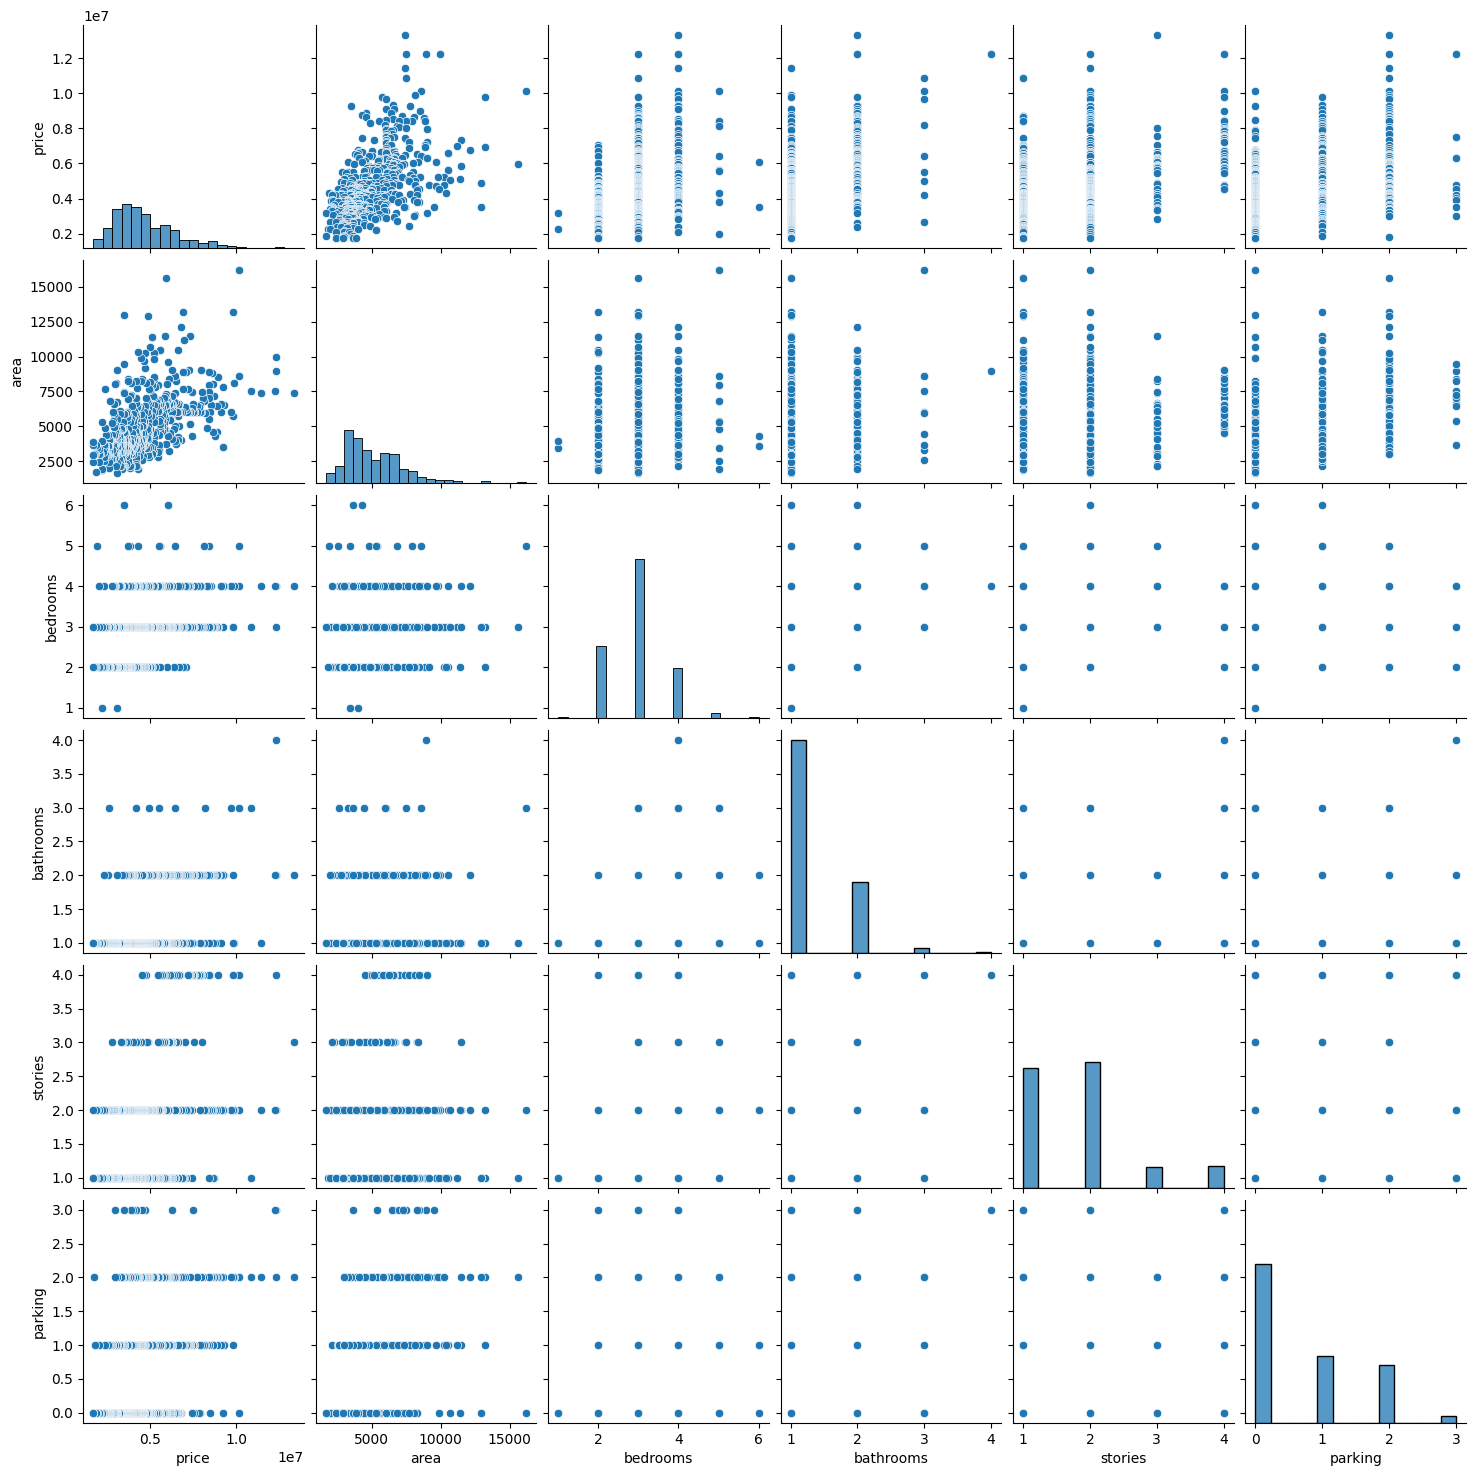

In [7]:
#also making a pair plot
import seaborn as sns
sns.pairplot(df2)
df2.shape

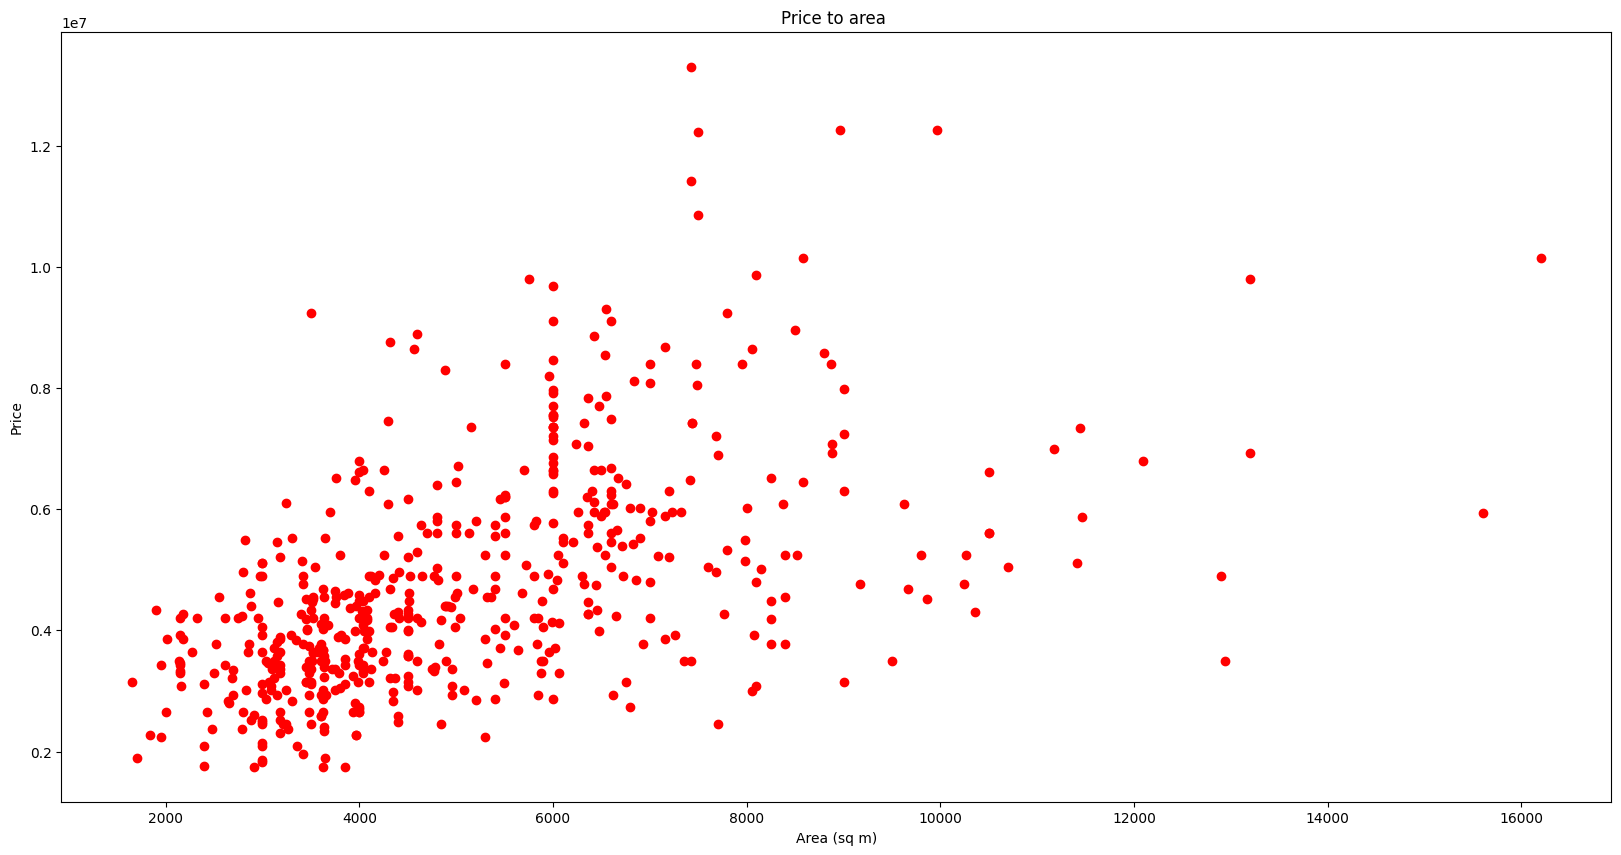

(545, 13)

In [8]:
#also making a scatter graph for price and area
x = df2["area"]
y = df2["price"]
plt.figure(figsize= (20,10))
plt.scatter(x, y, color ="red")
plt.title("Price to area ")
plt.xlabel("Area (sq m)")
plt.ylabel("Price")
plt.show()
df2.shape

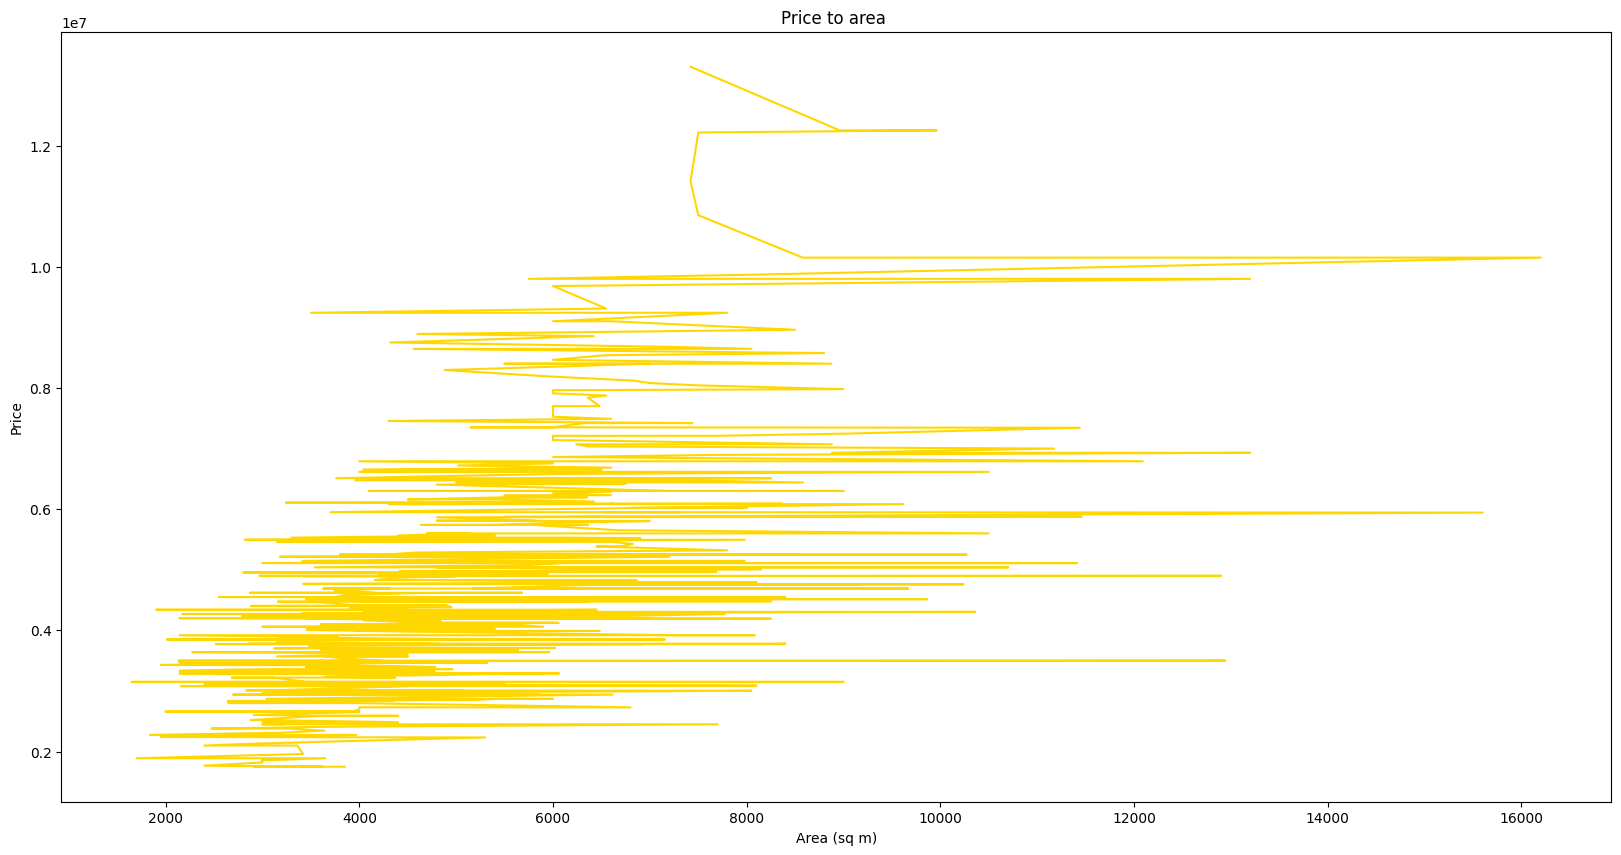

(545, 13)

In [9]:
# if we even want to see the line plot can do it, but not effectiev in ths case
x = df2["area"]
y = df2["price"]
plt.figure(figsize= (20,10))  #need to be placed eore plotting function necessarily
plt.plot(x, y, color= "gold")  #plot is for line graph

plt.title("Price to area ")
plt.xlabel("Area (sq m)")
plt.ylabel("Price")
plt.show()
df2.shape

77
0


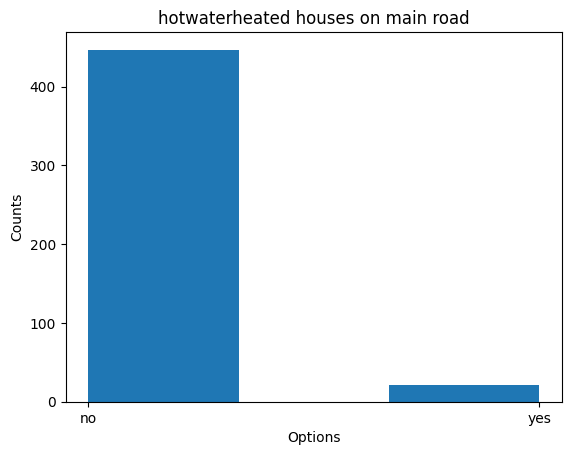

In [10]:
#Now, we need to see the % of houses which are on main road and have access to hotwater
#we need plotly express so
#%pip install plotly
"""
import plotly.express as ex

#ex.figure(figsize= (10,10))  #need to be placed eore plotting function necessarily
ex.pie(df["bedrooms"], "bedrooms", "mainroad")  #plot is for line graph
plt.title("Houses on main road and have hotwaterheating ")
plt.show()
"""
"""
for index, value in df["mainroad"].items():  # this is the basic syntax
    if value == "yes":
        #print("okay")
    else:
        #print("not okay")
"""
df3 = df2[df2.mainroad == "yes"] #a new dataframe containing only mainroad options
for index, value in df3["mainroad"].items():  # this is the basic syntax for checking if there is any non-mainroad house left in new data!!!
    if value == "no":
        print("not okay")
   
#df1.head(30)
print(df2["mainroad"].value_counts()["no"])  #checking counts of a specific category in python
print(df3["mainroad"].value_counts()["no"])

plt.hist(df3["hotwaterheating"], bins = 3)
plt.title("hotwaterheated houses on main road")
plt.xlabel("Options")
plt.ylabel("Counts")
plt.show()

#df1.head(100)

(545, 13)

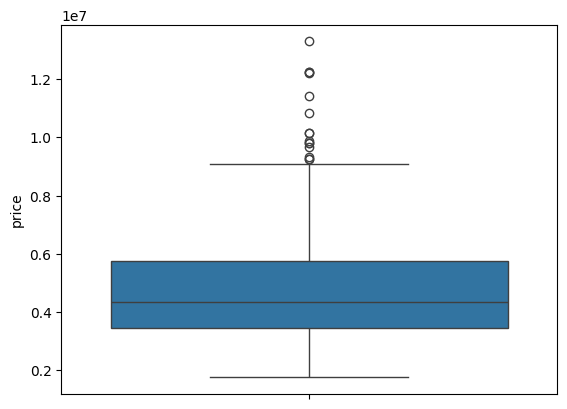

In [11]:
#checking outliers in prices via boxplot
# we will use seaborn
sns.boxplot(df2["price"])
df2.shape

In [12]:
#converting categorical columns into numerical

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

colums_to_convert = ["mainroad", "guestroom","basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
for column in colums_to_convert:
    df2[column] = LabelEncoder().fit_transform(df2[column])  #one hot encoding
print(df2)
df2.shape

        price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0    13300000  7420         4          2        3         1          0   
1    12250000  8960         4          4        4         1          0   
2    12250000  9960         3          2        2         1          0   
3    12215000  7500         4          2        2         1          0   
4    11410000  7420         4          1        2         1          1   
..        ...   ...       ...        ...      ...       ...        ...   
540   1820000  3000         2          1        1         1          0   
541   1767150  2400         3          1        1         0          0   
542   1750000  3620         2          1        1         1          0   
543   1750000  2910         3          1        1         0          0   
544   1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
0           0                0           

(545, 13)

In [13]:
#min-max scalling is applicable to continous and numeric feature values
"""
colums_to_convert1 = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]
#for column in colums_to_convert1: # it doesnot require loop, does without it
df2[colums_to_convert1] = MinMaxScaler().fit_transform(df2[colums_to_convert1])  #min max scaling
df2
"""

'\ncolums_to_convert1 = ["price", "area", "bedrooms", "bathrooms", "stories", "parking"]\n#for column in colums_to_convert1: # it doesnot require loop, does without it\ndf2[colums_to_convert1] = MinMaxScaler().fit_transform(df2[colums_to_convert1])  #min max scaling\ndf2\n'

In [14]:
#hypothesis testing that "price is not related (independent) of the number of rooms"
from scipy import stats
grp1 = df2[df2["price"] <= 0.5000]["bedrooms"]
grp2 = df2[df2["price"] >  0.5000]["bedrooms"]

result = stats.ttest_ind(grp1, grp2)
result

C:\Users\hp\AppData\Local\Temp\ipykernel_21020\3257519676.py:6: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  result = stats.ttest_ind(grp1, grp2)


TtestResult(statistic=nan, pvalue=nan, df=nan)

In [39]:
"""
Low p-value (typically ≤ 0.05): This suggests that the observed data is unlikely under the null hypothesis. Thus, you reject the null hypothesis in favor of the alternative hypothesis. For example, if the p-value is 0.03, there is a 3% chance of observing the data assuming the null hypothesis is true, which is low enough to consider the null hypothesis unlikely.

High p-value (typically > 0.05): This indicates that the observed data is consistent with the null hypothesis, and you fail to reject it. For instance, if the p-value is 0.6, the data is quite likely under the null hypothesis, so you do not have enough evidence to reject it.
"""
# so, we reject the null hypothesis!!!

'\nLow p-value (typically ≤ 0.05): This suggests that the observed data is unlikely under the null hypothesis. Thus, you reject the null hypothesis in favor of the alternative hypothesis. For example, if the p-value is 0.03, there is a 3% chance of observing the data assuming the null hypothesis is true, which is low enough to consider the null hypothesis unlikely.\n\nHigh p-value (typically > 0.05): This indicates that the observed data is consistent with the null hypothesis, and you fail to reject it. For instance, if the p-value is 0.6, the data is quite likely under the null hypothesis, so you do not have enough evidence to reject it.\n'

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

"""
x = df  
y = df["price"]  # Target variable
"""

#we need to drop the target column
x = df2.drop(columns = "price") #features column  
#x = df[["area"]]   #to check the plot with a single feature # for multiple we would need pair plot
y = df2["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.50, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#acc = accuracy_score(y_test, y_pred)
#print(acc)


#for linear regression, we would check mean-absolute error:
#df2 = df.tail(273)  #this not needed, because we will use y_test values, which are the actual y values in this case!!!
#y_true = df2["price"]


#now 
MAE = mean_absolute_error(y_test, y_pred)
print("MAE : ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("MSE : ", MSE)

#calculate R-squared of regression model
R_squared = model.score(X_train, y_train)
print("R_Squared : ", R_squared)

"""
# Visualisatie van de regressielijn
plt.scatter(X_test, y_test,  color='gray') #for plotting test_values of model
plt.plot(X_test, pred, color="blue", linewidth=3) #for plotting line
# Add labels and title
plt.xlabel('Prices Predictions')
plt.ylabel('Features')
plt.title('Pricing')
plt.grid("True")

# Show the plot
plt.show()
"""

MAE :  0.07559661524235294
MSE :  0.010291060342933837
R_Squared :  0.6761022179600147


'\n# Visualisatie van de regressielijn\nplt.scatter(X_test, y_test,  color=\'gray\') #for plotting test_values of model\nplt.plot(X_test, pred, color="blue", linewidth=3) #for plotting line\n# Add labels and title\nplt.xlabel(\'Prices Predictions\')\nplt.ylabel(\'Features\')\nplt.title(\'Pricing\')\nplt.grid("True")\n\n# Show the plot\nplt.show()\n'

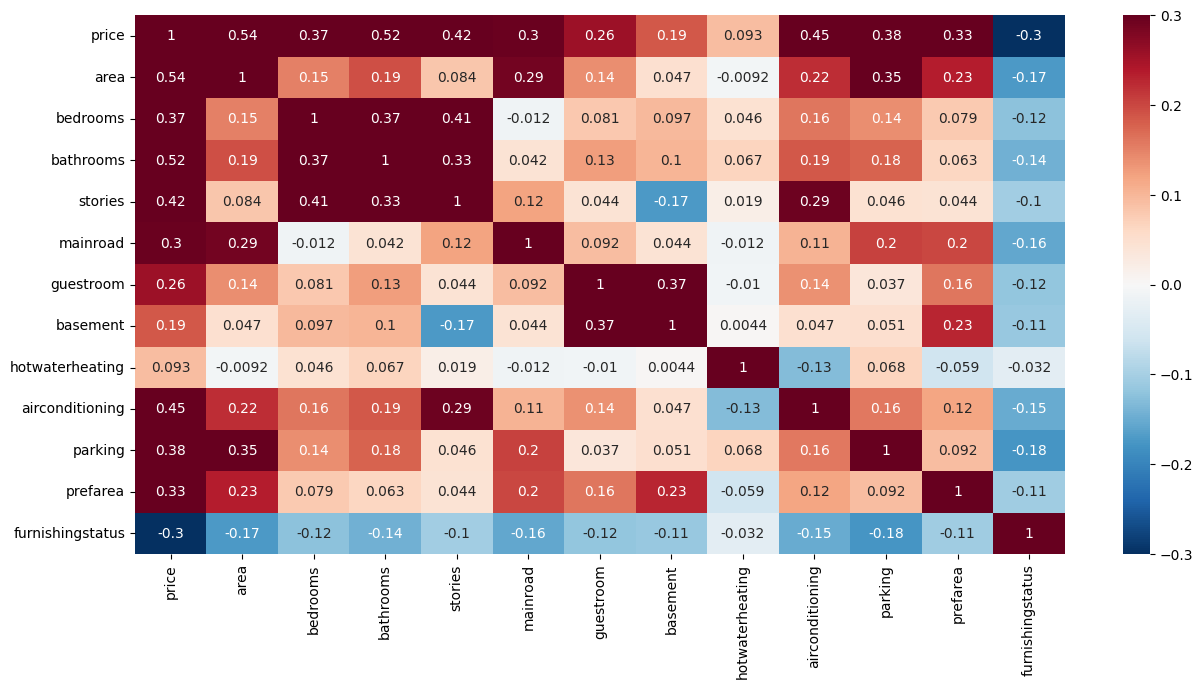

In [41]:
#creating Correlation Heatmap
cor = df2.corr()
plt.figure(figsize=(15,7))
heatmap = sns.heatmap(cor, annot=True, linewidths=0, vmin=-0.3, vmax=0.3, cmap="RdBu_r")

#only furnishing status needs to be removed and that can be easily viewed
# we can also drop the furnishing status column!!!


In [42]:
#again training the model using regression feature elimination (using heatmap)

#we need to select specific columns (only furnishing status needs to be dropped here!!!)
#x = df[["area","bathrooms", "stories", "airconditioning", "bedrooms", "mainroad","guestroom","basement","hotwaterheating","parking","prefarea"]] #features column  
x = df2.drop(columns = ["price", "furnishingstatus"])
#x = df[["area"]]   #to check the plot with a single feature # for multiple we would need pair plot
y = df2["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#acc = accuracy_score(y_test, y_pred)
#print(acc)


#for linear regression, we would check mean-absolute error:
#df2 = df.tail(273)  #this not needed, because we will use y_test values, which are the actual y values in this case!!!
#y_true = df2["price"]


#now 
MAE = mean_absolute_error(y_test, y_pred)
print("MAE : ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("MSE : ", MSE)

#calculate R-squared of regression model
R_squared = model.score(X_train, y_train)
print("R_Squared : ", R_squared)

#so only removing furnishingstatus is the factor that needs to be removed and it increases mean absolute error!

MAE :  0.08477162045183882
MSE :  0.013498950317415135
R_Squared :  0.6781204341087314


(545, 13)


<Axes: ylabel='price'>

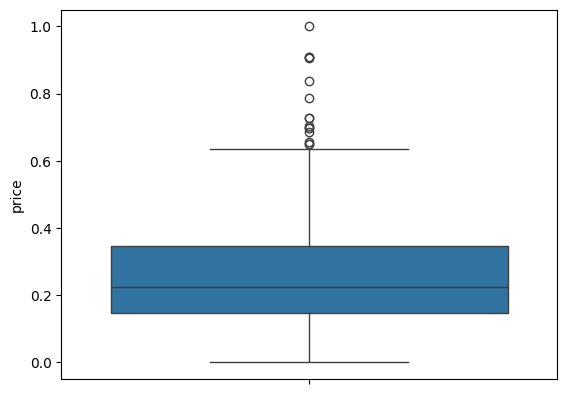

In [43]:
# now trying to reduce MAE more by removing outliers 
print(df2.shape)
#original plot:
# we will use seaborn
sns.boxplot(df2["price"])

(530, 13)


<Axes: ylabel='price'>

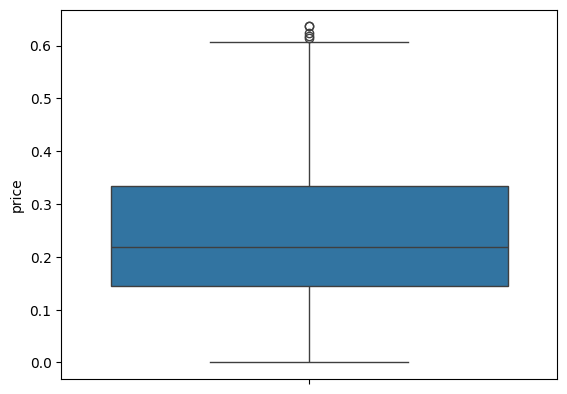

In [44]:
#now removing outliers
import numpy as np
# IQR
# Calculate the upper and lower limits
q1 = df2["price"].quantile(0.25)
q3 = df2["price"].quantile(0.75)
iqr = q3 - q1
l_limit = q1 - 1.5*iqr
u_limit = q3 + 1.5*iqr

#arrays of bolean values indicating outlier values
l_array = np.where(df2["price"] <= l_limit)
u_array = np.where(df2["price"] >= u_limit)


#filter the rows:
df_new = df2[(df2["price"] >= l_limit) & (df2["price"] <= u_limit)]


#df_new.drop(index=u_array, inplace=True)
#df.drop(index=l_array, inplace=True)

# now new shape:
print(df_new.shape)


#and the new box plot
sns.boxplot(df_new["price"])
#sns.boxplot(df_new["area"])

In [46]:
# now testing the regression model again to check MAE:
x = df_new.drop(columns = ["price", "furnishingstatus"])
#x = df[["area"]]   #to check the plot with a single feature # for multiple we would need pair plot
y = df_new["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#acc = accuracy_score(y_test, y_pred)
#print(acc)


#for linear regression, we would check mean-absolute error:
#df2 = df.tail(273)  #this not needed, because we will use y_test values, which are the actual y values in this case!!!
#y_true = df2["price"]


#now 
MAE = mean_absolute_error(y_test, y_pred)
print("MAE : ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("MSE : ", MSE)

#calculate R-squared of regression model
R_squared = model.score(X_train, y_train)
print("R_Squared : ", R_squared)

MAE :  0.06885146475184106
MSE :  0.00880133012183557
R_Squared :  0.6581558484033723


(530, 13)


<Axes: ylabel='price'>

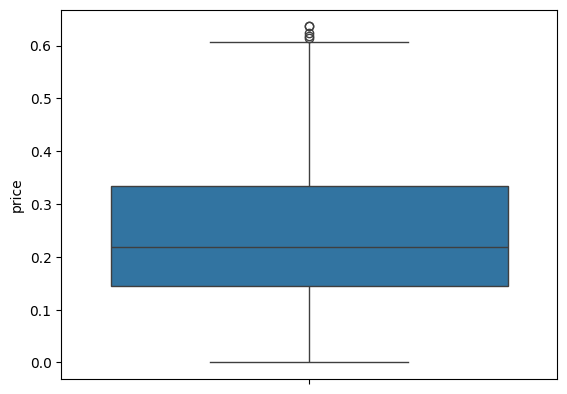

In [47]:
#now removing the remaing outliers too
#filter the rows:
#arrays of bolean values indicating outlier values
l_array = np.where(df_new["price"] <= l_limit)
u_array = np.where(df_new["price"] >= u_limit)

df_new1 = df_new[(df_new["price"] > l_limit) & (df_new["price"] < u_limit)]


#df_new.drop(index=u_array, inplace=True)
#df.drop(index=l_array, inplace=True)

# now new shape:
print(df_new1.shape)


#and the new box plot
sns.boxplot(df_new1["price"])

#here we found still some outliers not removed

(519, 13)


<Axes: ylabel='price'>

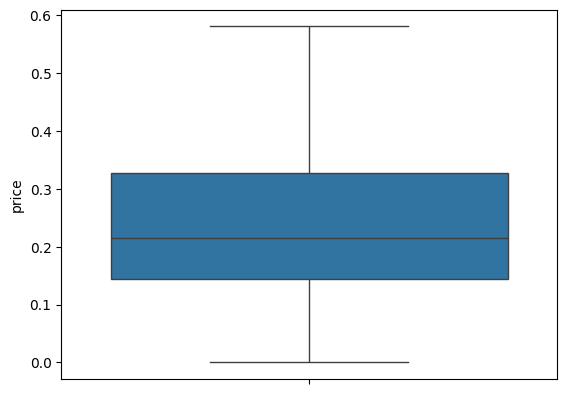

In [48]:
#using a different multiplier instead of 1.5 * IQR. For example, using 2.5 * IQR or 3.0 * IQR could help catch more extreme outliers.
l_limit = q1 - 1.5*iqr
u_limit = q3 + 1.2*iqr  #chnaging this range, all outliers are removed, now we can test !!!

#arrays of bolean values indicating outlier values
l_array = np.where(df2["price"] <= l_limit)
u_array = np.where(df2["price"] >= u_limit)


#filter the rows:
df_new2 = df_new1[(df_new1["price"] >= l_limit) & (df_new1["price"] <= u_limit)]


#df_new.drop(index=u_array, inplace=True)
#df.drop(index=l_array, inplace=True)

# now new shape:
print(df_new2.shape)


#and the new box plot
sns.boxplot(df_new2["price"])
#sns.boxplot(df_new["area"])

In [49]:
# now testing the regression model again to check MAE:
x = df_new2.drop(columns = ["price", "furnishingstatus"])
#x = df[["area"]]   #to check the plot with a single feature # for multiple we would need pair plot
y = df_new2["price"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size = 0.20, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(y_pred)
#acc = accuracy_score(y_test, y_pred)
#print(acc)


#for linear regression, we would check mean-absolute error:
#df2 = df.tail(273)  #this not needed, because we will use y_test values, which are the actual y values in this case!!!
#y_true = df2["price"]


#now 
MAE = mean_absolute_error(y_test, y_pred)
print("MAE : ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("MSE : ", MSE)

#calculate R-squared of regression model
R_squared = model.score(X_train, y_train)
print("R_Squared : ", R_squared)


#now, we can see that the MAE is being reduced extensively to 0.059

[0.19948653 0.3417469  0.37702527 0.18730862 0.34239293 0.11238947
 0.15998631 0.27785159 0.24144927 0.11144634 0.28689728 0.27117097
 0.14747548 0.13592701 0.43664803 0.21207136 0.16980048 0.39569828
 0.17436323 0.34142952 0.33716749 0.30065398 0.32897749 0.26883184
 0.18250582 0.20755447 0.31906167 0.13762286 0.2211358  0.16456928
 0.14092068 0.13318321 0.1340589  0.45948507 0.27288899 0.37006525
 0.17251561 0.41531084 0.25841168 0.34957469 0.22947174 0.20356284
 0.33071705 0.14922736 0.1638358  0.26437559 0.23797017 0.22155398
 0.24324482 0.15669948 0.23121351 0.21455613 0.4481348  0.29113017
 0.25721326 0.27172619 0.1197005  0.34756314 0.41690292 0.41136004
 0.15278814 0.05870093 0.13894794 0.19687433 0.42837084 0.28130078
 0.19643275 0.30115692 0.18465743 0.45775852 0.42656838 0.34361655
 0.50683533 0.5065075  0.17640189 0.27187638 0.23739745 0.15600302
 0.19583616 0.21375748 0.32714513 0.35675991 0.43468015 0.17152204
 0.23244771 0.34797065 0.38264125 0.42464456 0.18080794 0.3710

In [50]:
#incorporating to streamlit app:

f'The price will be {y_pred}'

'The price will be [0.19948653 0.3417469  0.37702527 0.18730862 0.34239293 0.11238947\n 0.15998631 0.27785159 0.24144927 0.11144634 0.28689728 0.27117097\n 0.14747548 0.13592701 0.43664803 0.21207136 0.16980048 0.39569828\n 0.17436323 0.34142952 0.33716749 0.30065398 0.32897749 0.26883184\n 0.18250582 0.20755447 0.31906167 0.13762286 0.2211358  0.16456928\n 0.14092068 0.13318321 0.1340589  0.45948507 0.27288899 0.37006525\n 0.17251561 0.41531084 0.25841168 0.34957469 0.22947174 0.20356284\n 0.33071705 0.14922736 0.1638358  0.26437559 0.23797017 0.22155398\n 0.24324482 0.15669948 0.23121351 0.21455613 0.4481348  0.29113017\n 0.25721326 0.27172619 0.1197005  0.34756314 0.41690292 0.41136004\n 0.15278814 0.05870093 0.13894794 0.19687433 0.42837084 0.28130078\n 0.19643275 0.30115692 0.18465743 0.45775852 0.42656838 0.34361655\n 0.50683533 0.5065075  0.17640189 0.27187638 0.23739745 0.15600302\n 0.19583616 0.21375748 0.32714513 0.35675991 0.43468015 0.17152204\n 0.23244771 0.34797065 0.3826

 # for streamlit app

In [36]:
"""
use this video if needed: https://www.youtube.com/watch?v=LwJgzEpQ_co&t=809s
"""

'\nuse this video if needed: https://www.youtube.com/watch?v=LwJgzEpQ_co&t=809s\n'